In [4]:
experiment='run_330d_partnodisk'

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.tri import Triangulation
from matplotlib import cm, patches, collections

from pynextsim import NextsimBin
from pynextsim.nextsim_mesh import NextsimMesh

from pynextsim.gmshlib import GmshMesh

from pynextsim.drifter_time_series import *
import pynextsim.lib as nsl

%matplotlib notebook

In [6]:
mesh_file='/data/experiments/'+experiment+'/mesh_crash.bin'
mesh = NextsimMesh(mesh_file)

In [7]:
field_file='/data/experiments/'+experiment+'/field_crash.bin'
field = NextsimBin(field_file)

In [8]:
drifters_file='/data/experiments/'+experiment+'/test_drifters.nc'

In [9]:
drft_datetimes, drft_indices, drft_data = read_nextsim_drifter_netcdf_file(drifters_file)

In [10]:
drft_c = DrifterTimeSeries(datetimes=drft_datetimes, indices=drft_indices, data=drft_data)

In [11]:
Ntraj = drft_c.data['Lon'].shape[0]
X, Y = drft_c.get_drifter_xy(mesh.mapping)
xlist, ilist, ydict = nsl.separate_vector_finite_segments(X, other_vecs={0: Y})

<IPython.core.display.Javascript object>


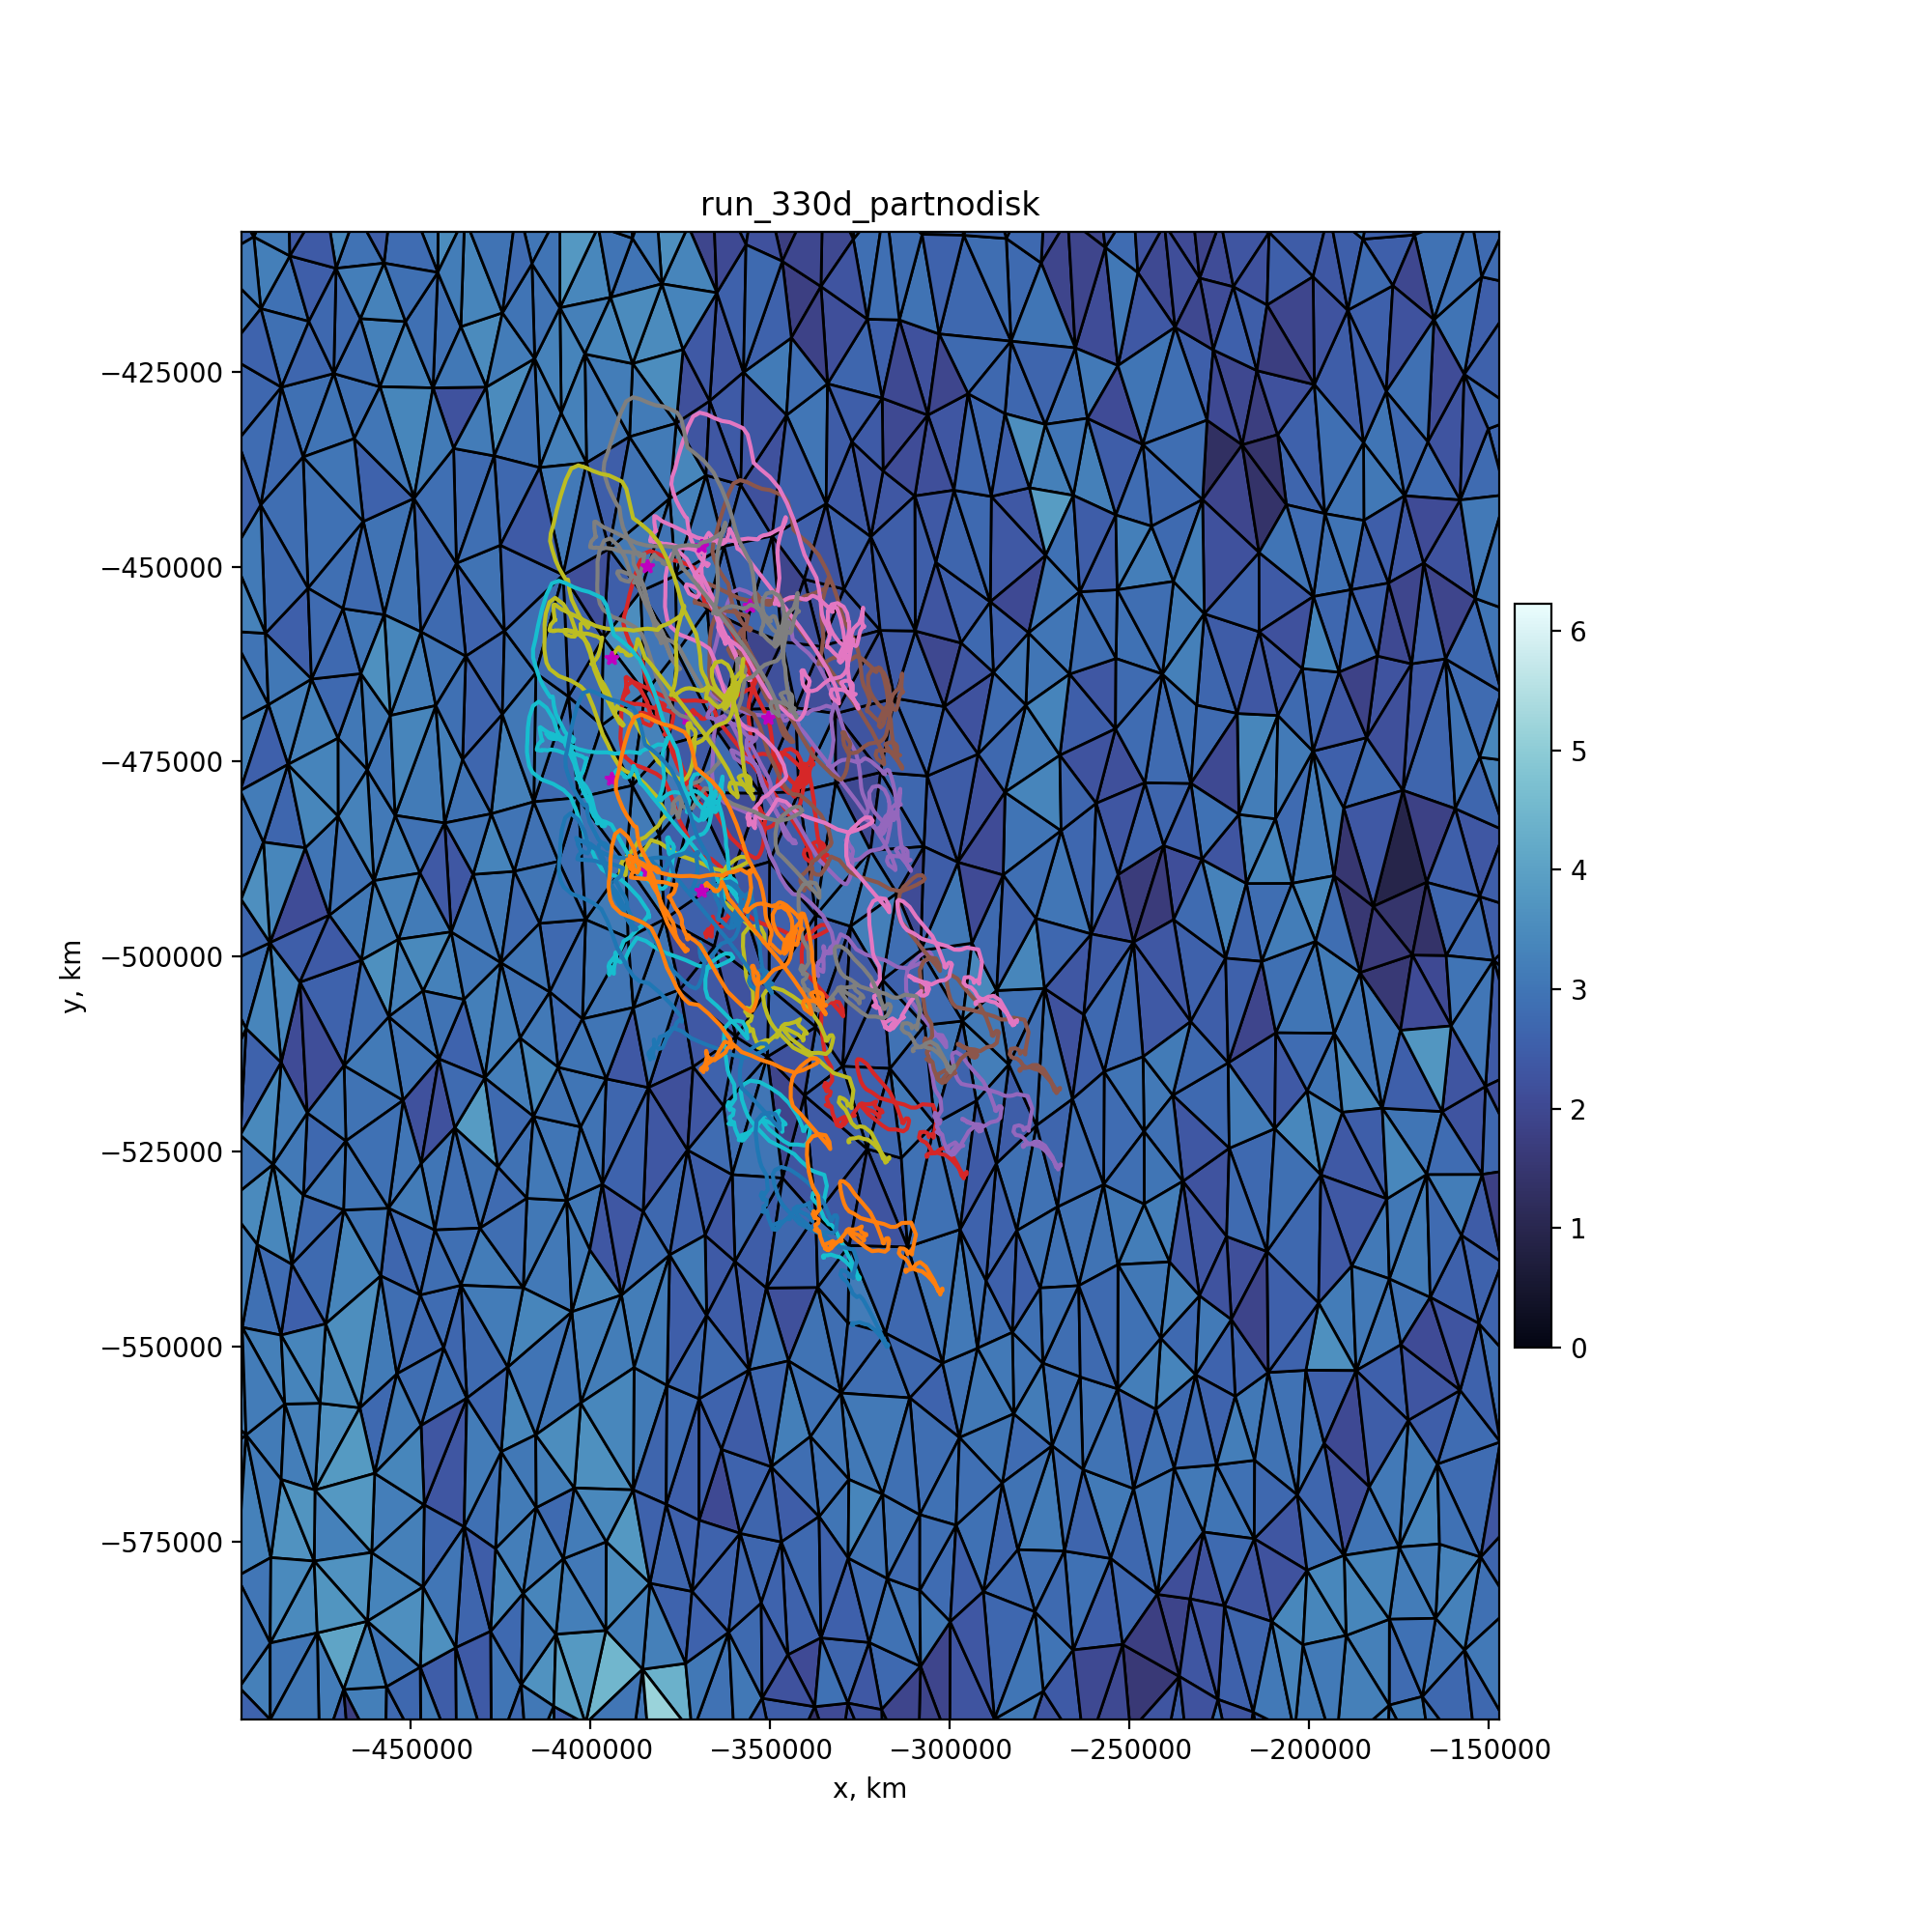

In [14]:
ax = plt.figure(figsize=(10, 10)).add_subplot(111)
fig = ax.figure

sfac=1
cmap='ice'

#mesh parameters
nodes_x, nodes_y = mesh.get_nodes_xy()
indices = mesh.get_indices("triangles", numbering='gmsh', asvector=False)
Nn = mesh.num_nodes
Ne = mesh.num_triangles

patch_list  = []

for inds in indices:
    ccl   = []
    for n in inds:
        ccl.append((sfac*nodes_x[n],sfac*nodes_y[n]))
    ccl.append(ccl[0]) # close the contour
    patch_list.append(patches.Polygon(ccl,True,linewidth=0))

pc = collections.PatchCollection(patch_list, cmap=cmap, alpha=1)

#data to fill
thick = field.get_var('Thickness')
data = thick

pc.set_array(data)
pc.set_edgecolor('k')

ax.add_collection(pc)

#drifters
Ntraj = drft_c.data['Lon'].shape[0]
X, Y = drft_c.get_drifter_xy(mesh.mapping)

for x, y in zip(X, Y):
    drft_c.plot_trajectory_segments(x, y, ax)

#ax.set_xlim([-1100,-700])
#ax.set_ylim([-700,-100])
#ax.set_aspect('equal')

ax.set_xlabel('x, km')
ax.set_ylabel('y, km')
plt.title(experiment)

cbar  = fig.colorbar(pc, ax=ax, orientation="vertical", pad=0.01, shrink=0.5)
plt.savefig('/plots/plots/map_drifters_on_iconc_mesh'+experiment+'.png')